In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pandas basics

## numpy to data frame

In [2]:
n_data = np.array([[1,2],[3,4],[5,6],[7,8]])
n_data

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [3]:
df_data1 = pd.DataFrame(n_data)
df_data2 = pd.DataFrame(n_data, columns=["First", "Second"], index=["a", "b", "c", "d"])

In [4]:
df_data1

,0,1
0,1,2
1,3,4
2,5,6
3,7,8


In [5]:
df_data2

,First,Second
a,1,2
b,3,4
c,5,6
d,7,8


## data frame to numpy

In [6]:
df_data1.to_numpy()

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [7]:
df_data2.to_numpy()

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

## selecting a column as series

In [8]:
s_first = df_data2["First"]
print(type(s_first))

<class 'pandas.core.series.Series'>


In [9]:
s_first

a    1
b    3
c    5
d    7
Name: First, dtype: int64

In [10]:
s_first.describe()

count    4.000000
mean     4.000000
std      2.581989
min      1.000000
25%      2.500000
50%      4.000000
75%      5.500000
max      7.000000
Name: First, dtype: float64

## loading a csv file: weight-height dataset

In [11]:
df = pd.read_csv('datasets/weight-height.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [12]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


## inspecting a data frame

In [13]:
df.shape

(10000, 3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [15]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [16]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [17]:
df.min()

Gender     Female
Height    54.2631
Weight    64.7001
dtype: object

In [18]:
df.max()

Gender       Male
Height    78.9987
Weight     269.99
dtype: object

In [19]:
df.mean()

Height     66.367560
Weight    161.440357
dtype: float64

In [20]:
df.median()

Height     66.318070
Weight    161.212928
dtype: float64

In [21]:
df[["Height", "Weight"]].apply(np.int64).mode()

,Height,Weight
0,67,142


In [22]:
df.std()

Height     3.847528
Weight    32.108439
dtype: float64

## inspecting a series

In [23]:
s_height = df["Height"]
print(type(s_height))

<class 'pandas.core.series.Series'>


In [24]:
s_height.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [25]:
s_height.tail()

9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, dtype: float64

In [26]:
print("max()", s_height.max())
print("min()", s_height.min())
print("mean()", s_height.mean())
print("std()", s_height.std())

max() 78.99874234638959
min() 54.2631333250971
mean() 66.36755975482124
std() 3.847528120773229


## sample and visualize it

In [27]:
df_samples = df.sample(500)[['Height', 'Weight']]
print(type(df_samples))

<class 'pandas.core.frame.DataFrame'>


In [28]:
df_samples

,Height,Weight
245,65.498995,156.869952
8411,65.332014,144.806620
4140,72.152094,181.243648
9171,61.638557,128.553974
2309,71.253535,205.353927
5615,63.780451,125.964967
6314,63.497066,134.915439
9346,63.382591,132.513944
9256,62.302020,139.137906
5056,62.248346,138.382413


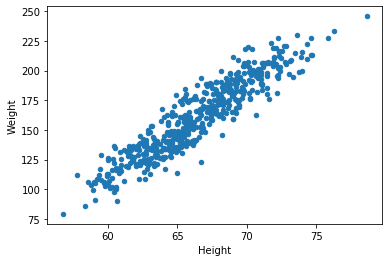

In [29]:
df_samples.plot.scatter(x=0, y=1)

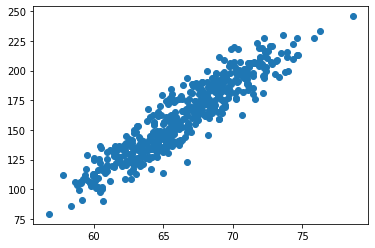

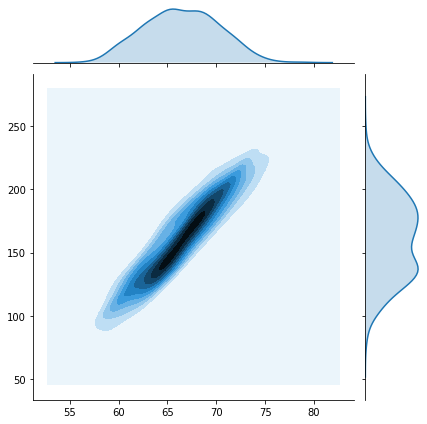

In [30]:
# convert into numpy and draw
data_samples = df_samples.to_numpy()
plt.scatter(x=data_samples[:,0], y=data_samples[:,1])

sns.jointplot(data_samples[:,0], data_samples[:,1], kind="kde")

## split into train set and test set

In [31]:
df_train = df.sample(frac=0.7)
df_test = df.drop(df_train.index)

In [32]:
df_train

,Gender,Height,Weight
5333,Female,61.722079,107.224707
8522,Female,67.953658,167.090126
4237,Male,67.060021,187.725678
4146,Male,66.226253,166.052641
4011,Male,69.118045,203.596695
3026,Male,67.352019,174.629995
437,Male,68.550880,175.219519
3043,Male,70.462303,191.920727
2704,Male,68.538978,179.571466
2544,Male,69.458663,187.910876


In [33]:
df_test

,Gender,Height,Weight
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
5,Male,67.253016,152.212156
8,Male,67.018950,175.929440
13,Male,69.283070,189.446181
14,Male,69.243732,186.434168
15,Male,67.645620,172.186930
17,Male,63.974326,172.883470
22,Male,66.149132,149.173566
23,Male,75.205974,228.761781
